Transfer LEarning -- Using already existing model which is built by the researchers.

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist

from keras.utils import np_utils

In [47]:
# Load the data into train and test for MNIST

In [48]:
(x_train,y_train),(x_test,y_test)= mnist.load_data()
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [49]:
#normalize the value between 0-1

x_train = x_train/255.0
x_test=x_test/255.0

In [50]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)

In [51]:
x_train.shape,x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [52]:
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [53]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(60000, 28, 28, 1) (60000, 10)
(10000, 28, 28, 1) (10000, 10)


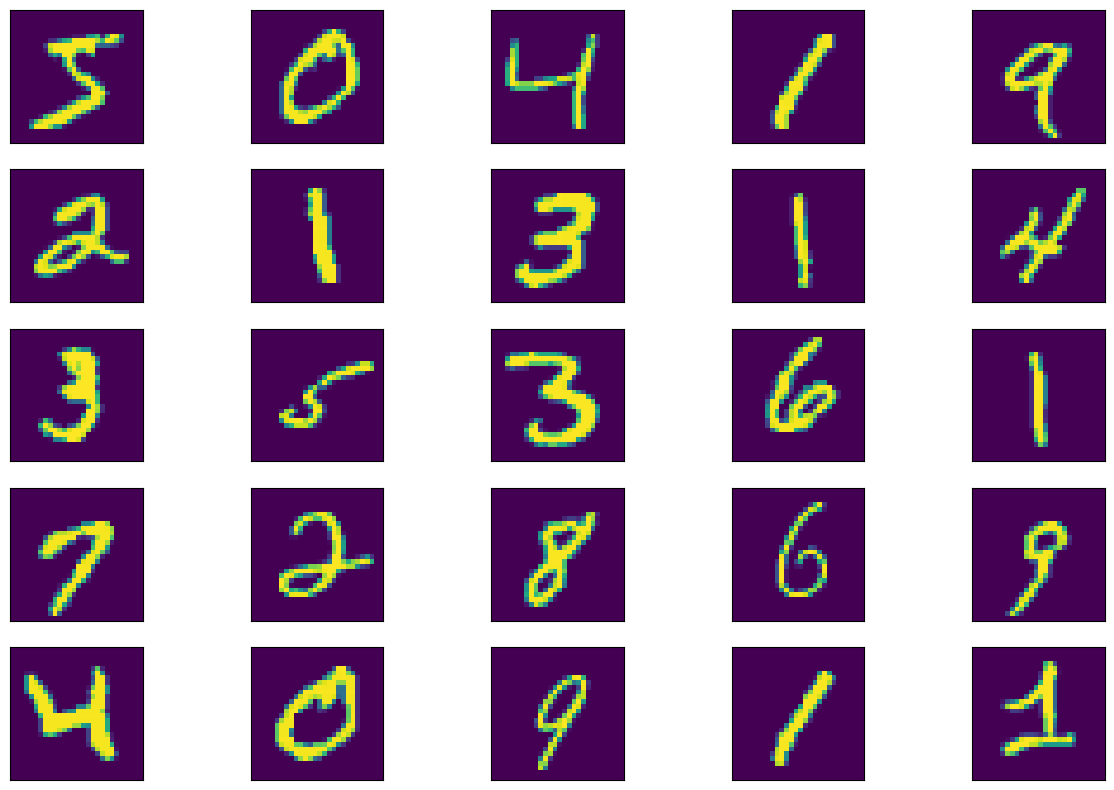

In [54]:
plt.figure(figsize=(15,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i])

plt.show()

In [55]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, AveragePooling2D

In [56]:
#API

model = Sequential()

#C1 Convulation Layer
model.add(Conv2D(6,kernel_size=(5,5),strides=(1,1),padding='valid',activation='tanh',input_shape=(28,28,1)))
# POOLING LAYER 1
model.add(AveragePooling2D(pool_size=(2,2),strides=(2,2),padding='valid'))
#C2 Convulation Layer
model.add(Conv2D(16,kernel_size=(5,5),strides=(1,1),padding='valid',activation='tanh'))
#Pooling Layer 2
model.add(AveragePooling2D(pool_size=(2,2),strides=(2,2),padding='valid'))


#DNN
model.add(Flatten())
model.add(Dense(120,activation='tanh'))
model.add(Dense(84,activation='tanh'))
model.add(Dense(10,activation='softmax'))


#SUmmary
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d_8 (Averag  (None, 12, 12, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_9 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_9 (Averag  (None, 4, 4, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten_4 (Flatten)         (None, 256)               0         
                                                                 
 dense_12 (Dense)            (None, 120)              

In [57]:
# Compiling the model.

model.compile(optimizer='adam',loss = tf.keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [58]:
#Fitting the model
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5,batch_size=128)

Epoch 1/5
469/469 [==============================] - 15s 6ms/step - loss: 0.3562 - accuracy: 0.8981 - val_loss: 0.1874 - val_accuracy: 0.9410
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.1339 - accuracy: 0.9590 - val_loss: 0.0969 - val_accuracy: 0.9690
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0869 - accuracy: 0.9739 - val_loss: 0.0729 - val_accuracy: 0.9770
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0646 - accuracy: 0.9801 - val_loss: 0.0592 - val_accuracy: 0.9804
Epoch 5/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0518 - accuracy: 0.9840 - val_loss: 0.0545 - val_accuracy: 0.9819


Text(0, 0.5, 'Losses')

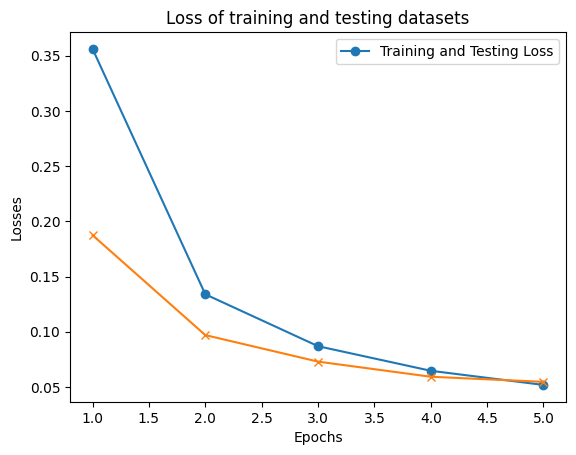

In [63]:
f,ax = plt.subplots()

ax.plot([None] + history.history['loss'],'o-')
ax.plot([None] + history.history['val_loss'],'x-')

ax.legend(["Training and Testing Loss"],loc=0)
ax.set_title("Loss of training and testing datasets")
ax.set_xlabel("Epochs")
ax.set_ylabel("Losses")

Text(0, 0.5, 'Accuracy')

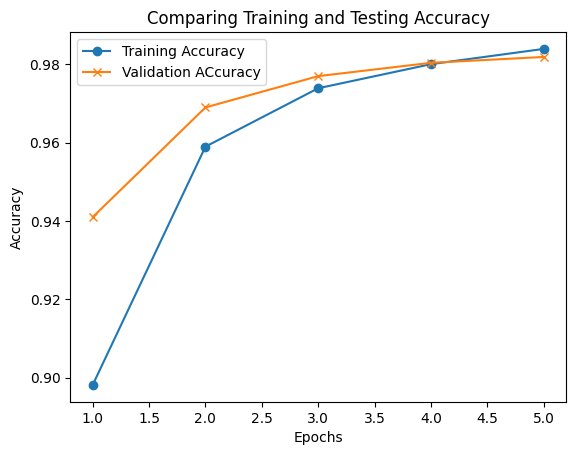

In [59]:
#Visualize the output

f,ax = plt.subplots()

ax.plot([None] + history.history['accuracy'], 'o-')
ax.plot([None] + history.history['val_accuracy'],'x-')

ax.legend(["Training Accuracy","Validation ACcuracy"],loc=0)
ax.set_title("Comparing Training and Testing Accuracy")
ax.set_xlabel('Epochs')
ax.set_ylabel("Accuracy")

Done. Very good result using LeNet model.